<a href="https://colab.research.google.com/github/lourencocavalcante/Neurocomputacao/blob/main/CAP351_Projeto_01_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" align="middle">](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 500 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


---


# **CAP-351 Neurocomputação**

**Professor:**

* Dr. Marcos Goncalves Quiles

**Aluno:**
* Lourenço José Cavalcante Neto

# PROPOSTA DE PROJETO 1:

# REDE MLP:: Multi-layer Perceptron (MLP)

1. Selecionar dois datasets (não triviais)

  * Um dataset para classificação
  * Um dataset para regressão
  * Separar em treino/validação/teste

2. Treinar modelos MLP para os dois problemas

3. Considerar:
  * Diferentes topologias (>=5 topologias, variar número de
camadas)
  * Usar o algoritmo original SGD (não usar algoritmos otimizados,
e.g. ADAM)
  * Avaliar o impacto do uso do Momentum
  * Avaliar o impacto do uso da regularização (i.e. L2)

4. Ilustrar graficamente a evolução do treinamento (treino/validação).

5. Confeccionar um relatório (reprodutível) contendo os
experimentos e resultados

**Bibliotecas**

In [164]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

from sklearn.model_selection import train_test_split
import datetime
print(tf.__version__)

2.8.2


In [165]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dataset**

Importando os dados do **disdrômetro RD80 (Joss**)


In [189]:
#CRIANDO O DATAFRAME
#Dados do disdrômetro RD80. Chamado comumente de Joss. 
#Este equipamento mede a distribuição das gotas de chuva que chegam à superfície.
df_rd80_joss = pd.read_table('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/JWD_campina_report_RZLwcDmDtNdrop_b2.1_report.txt',header=None,delim_whitespace=True)


In [190]:
df_rd80_joss.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2020.0,3.0,17.0,13.0,52.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020.0,3.0,17.0,13.0,53.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020.0,3.0,17.0,13.0,54.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020.0,3.0,17.0,13.0,55.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020.0,3.0,17.0,13.0,56.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
print('Tamanho do dataset: ',df_rd80_joss.shape[0], ', quantiade de atributos: ', df_rd80_joss.shape[1])

Tamanho do dataset:  315420 , quantiade de atributos:  31


In [192]:
#Vamos adicionar os títulos das colunas:
df_rd80_joss.columns = ['Ano (YYYY)', 'Mes', 'dia', 'H', 'M', 'S','Rain Intensity (mm/h)', 'radar reflectivity (1/mm6m3)','Liquid watercontent (g/m3)',
'Mean weight diameter(mm)', 'Time integration (s)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)']


In [195]:
#Modificanto o tipo de dado das colunas referentes a Data e Horário para Inteiro(int) e do Rain Intensity (mm/h) para (float)
df_rd80_joss[['Ano (YYYY)', 'Mes', 'dia', 'H', 'M', 'S']] = df_rd80_joss[['Ano (YYYY)', 'Mes', 'dia', 'H', 'M', 'S']].astype(int)
#df_rd80_joss['Rain Intensity (mm/h)'] = df_rd80_joss['Rain Intensity (mm/h)'].astype(float)

In [ ]:
cont = df_rd80_joss.shape[0]
for index, row in df_rd80_joss.iterrows():
  #ano = '20' + str(int(row['Ano (YYYY)']))
  ano = str(int(row['Ano (YYYY)']))
  mes = '%02d' % int(row['Mes'])
  dia = '%02d' % int(row['dia'])
  h = '%02d' % int(row['H'])
  m = '%02d' % int(row['M'])
  s = '%02d' % int(row['S'])
    

  #print(mes)
  df_rd80_joss.loc[index, 'Data'] = str(ano) + '-' + str(mes) + '-'+ str(dia)
  df_rd80_joss.loc[index, 'Hora'] = str(h) + ':' + str(m) + ':'+ str(s)
  cont = cont - 1
  print(cont)

In [193]:
df_rd80_joss.head()

,Ano (YYYY),Mes,dia,H,M,S,Rain Intensity (mm/h),radar reflectivity (1/mm6m3),Liquid watercontent (g/m3),Mean weight diameter(mm),...,N(D),N(D),N(D),N(D),N(D),N(D),N(D),N(D),N(D),N(D)
0,2020.0,3.0,17.0,13.0,52.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020.0,3.0,17.0,13.0,53.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020.0,3.0,17.0,13.0,54.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020.0,3.0,17.0,13.0,55.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020.0,3.0,17.0,13.0,56.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
df_rd80_joss['Datetime'] = df_rd80_joss[['dia','Mes','Ano (YYYY)', 'H', 'M', 'S']].apply(lambda row:
                    datetime.datetime(year=row['Ano (YYYY)'], month=row['Mes'],day=row['dia'], hour=row['H'], minute=row["M"], second=row["S"]),axis=1)

df_rd80_joss = df_rd80_joss.drop(columns=['Ano (YYYY)', 'Mes', 'dia', 'H', 'M', 'S','N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)'])
df_rd80_joss = df_rd80_joss.set_index('Datetime')
df_rd80_joss.sort_values('Datetime',ascending=True,inplace=True)
df_rd80_joss.head()

,Rain Intensity (mm/h),radar reflectivity (1/mm6m3),Liquid watercontent (g/m3),Mean weight diameter(mm),Time integration (s)
Datetime,,,,,
2020-03-17 13:52:00,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:53:00,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:54:00,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:55:00,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:56:00,0.0,0.0,0.0,0.0,60.0


In [197]:
#Vamos assumir que os valores para Rain Intensity (mm/h) que forem menores que 0.1 sejam considerados como 0(zero)
df_rd80_joss['Rain Intensity (mm/h)'][df_rd80_joss['Rain Intensity (mm/h)'] < 0.1] = 0

In [198]:
#Vamos exportar o Dataframe para o formato CSV
df_rd80_joss.to_csv('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/df_final_rd80_joss.csv')

In [199]:
#Carregando o Dataset CSV
df_rd80_joss = pd.read_csv("/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/df_final_rd80_joss.csv")
df_rd80_joss = pd.DataFrame(df_rd80_joss)

In [ ]:
df_rd80_joss.isna().sum()

In [182]:
df_rd80_joss.dropna(inplace=True)
df_rd80_joss.reset_index(inplace=True, drop=True)

In [200]:
df_rd80_joss.head()

,Datetime,Rain Intensity (mm/h),radar reflectivity (1/mm6m3),Liquid watercontent (g/m3),Mean weight diameter(mm),Time integration (s)
0,2020-03-17 13:52:00,0.0,0.0,0.0,0.0,60.0
1,2020-03-17 13:53:00,0.0,0.0,0.0,0.0,60.0
2,2020-03-17 13:54:00,0.0,0.0,0.0,0.0,60.0
3,2020-03-17 13:55:00,0.0,0.0,0.0,0.0,60.0
4,2020-03-17 13:56:00,0.0,0.0,0.0,0.0,60.0


In [185]:
df_rd80_joss.describe()

,Rain Intensity (mm/h),radar reflectivity (1/mm6m3),Liquid watercontent (g/m3),Mean weight diameter(mm),Time integration (s)
count,315420.000000,315420.000000,315420.000000,315420.000000,315420.0
mean,0.372430,309.362454,0.018214,0.114891,60.0
std,3.418582,4704.699349,0.147274,0.356634,0.0
min,0.000000,0.000000,0.000000,0.000000,60.0
25%,0.000000,0.000000,0.000000,0.000000,60.0
50%,0.000000,0.000000,0.000000,0.000000,60.0
75%,0.000000,0.000000,0.000000,0.000000,60.0
max,128.895370,550486.250000,4.893830,5.361310,60.0


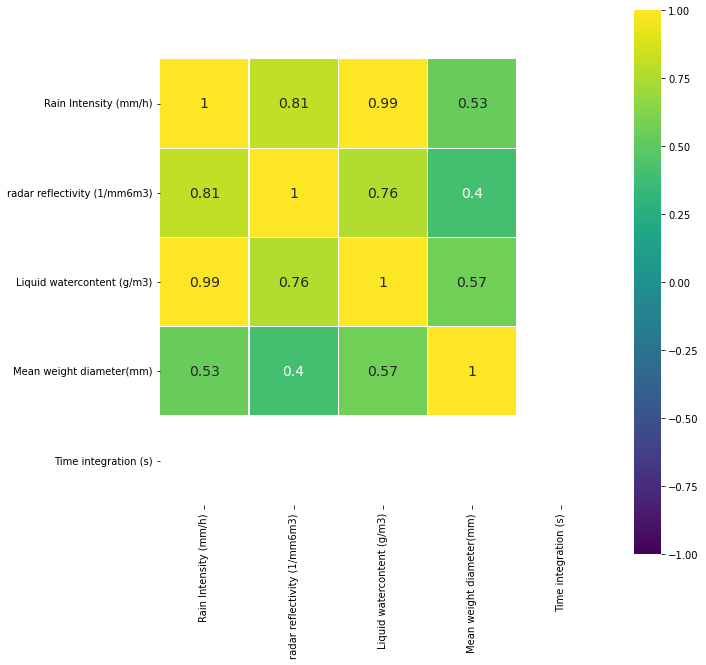

In [221]:
corr = df_rd80_joss.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 14}, square=True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


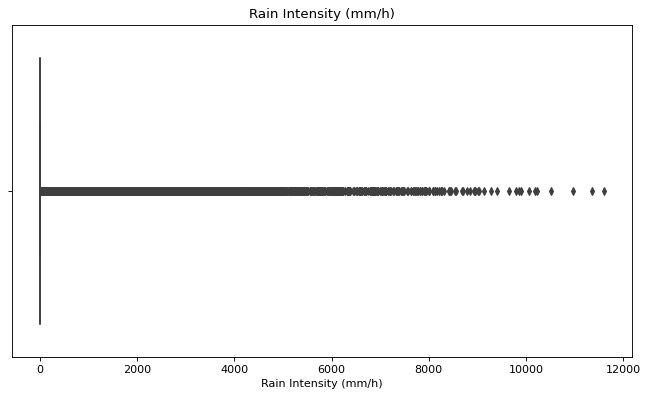

In [26]:
figure(figsize=(10,5.5),dpi=80)
g = sns.boxplot(df_rd80_joss['Rain Intensity (mm/h)'])
g.set_title('Rain Intensity (mm/h)')
plt.show()

[]

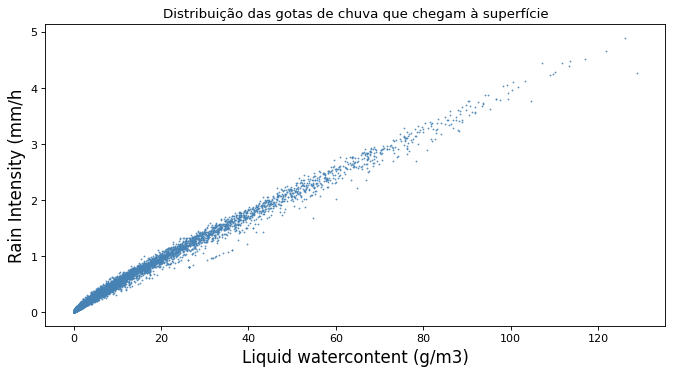

In [207]:
figure(figsize=(10,5),dpi=80)
plt.scatter(df_rd80_joss['Rain Intensity (mm/h)'] ,df_rd80_joss['Liquid watercontent (g/m3)'],s=0.3, color='#4682B4')
plt.xlabel(r'Liquid watercontent (g/m3)',size=15)
plt.ylabel(r'Rain Intensity (mm/h',size=15)
plt.title("Distribuição das gotas de chuva que chegam à superfície")
plt.plot()

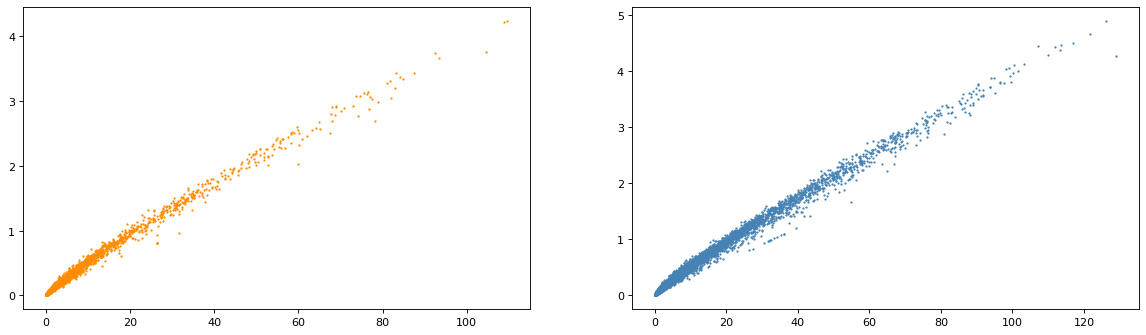

Tamanho do dataset para treinamento:  63084
Tamanho do dataset para validação:  252336


In [213]:
# Divisão do Dataset em treinamento e validação
x_train, x_test, y_train, y_test = train_test_split(df_rd80_joss['Rain Intensity (mm/h)'] ,df_rd80_joss['Liquid watercontent (g/m3)'], test_size=0.8)
figure(figsize=(18,5),dpi=80)
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, color='#FF8C00',s=1)
plt.subplot(1,2,2)
plt.scatter(x_test, y_test, color='#4682B4',s=1)
plt.show()


print('Tamanho do dataset para treinamento: ',len(x_train))
print('Tamanho do dataset para validação: ',len(x_test))

**Criação dos modelos**

Com o objetivo de construir uma rede capaz de encontrar uma lei de regressão para esses *problemas*, serão geradas 5 topologias de rede diferentes. O primeiro será o caso simples e clássico de um perceptron e o segundo aumentará o número de camadas e o número de neurônios.

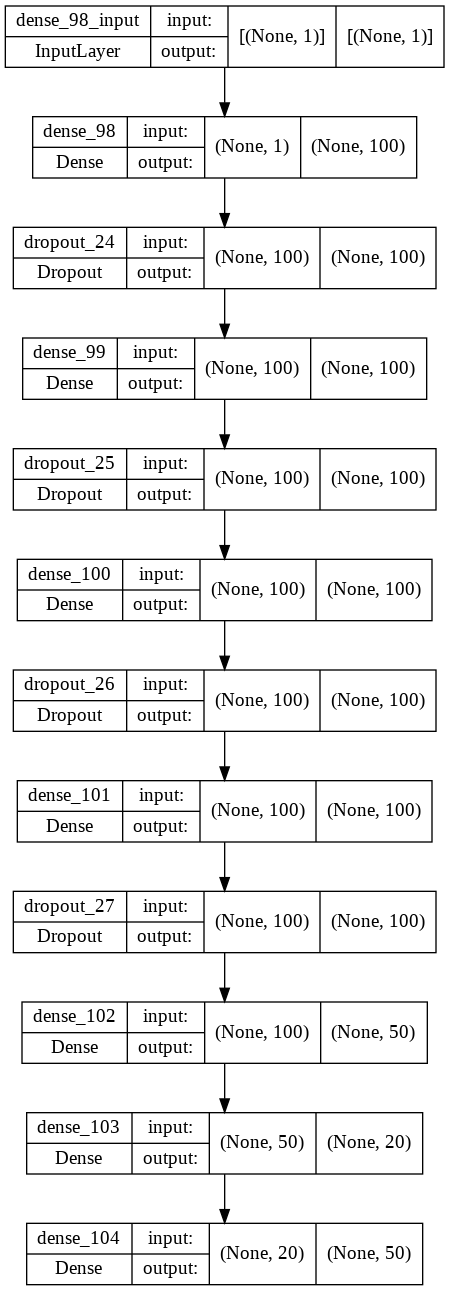

In [212]:
fl2 = 0.0
drop = 0.2

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
sgd_momentum_060 = SGD(learning_rate=0.01, decay=1e-6, momentum=0.60, nesterov=True)
adam = tf.keras.optimizers.Adam()

#modelo_a -- Simple Case
modelo_a = keras.Sequential()
modelo_a.add(keras.layers.Dense(units=3, input_shape=[1], activation="tanh"))
modelo_a.add(keras.layers.Dense(units=1, activation="linear"))
#tf.keras.utils.plot_model(modelo_a, show_shapes=True)

#modelo_b
modelo_b = keras.Sequential()
modelo_b.add(keras.layers.Dense(units=5, input_shape=[1], activation="tanh"))
modelo_b.add(keras.layers.Dense(units=5, activation="tanh"))
modelo_b.add(keras.layers.Dense(units=1, activation="linear"))
#tf.keras.utils.plot_model(modelo_b, show_shapes=True)

#modelo_c
modelo_c = keras.Sequential()
modelo_c.add(keras.layers.Dense(units=5, input_shape=[1], activation="tanh"))
modelo_c.add(keras.layers.Dense(units=5, activation="tanh"))
modelo_c.add(keras.layers.Dense(units=1, activation="linear"))
#tf.keras.utils.plot_model(modelo_c, show_shapes=True)

#modelo_final - Suposto melhor modelo
modelo_final = keras.Sequential()
modelo_final.add(keras.layers.Dense(units=100, kernel_regularizer=l2(fl2), input_shape=[1], activation="tanh"))
modelo_final.add(Dropout(drop))
modelo_final.add(keras.layers.Dense(units=100, kernel_regularizer=l2(fl2), activation="tanh"))
modelo_final.add(Dropout(drop))
modelo_final.add(keras.layers.Dense(units=100, kernel_regularizer=l2(fl2), activation="tanh"))
modelo_final.add(Dropout(drop))
modelo_final.add(keras.layers.Dense(units=100, kernel_regularizer=l2(fl2), activation="tanh"))
modelo_final.add(Dropout(drop))
modelo_final.add(keras.layers.Dense(units=50, kernel_regularizer=l2(fl2), activation="tanh"))
modelo_final.add(keras.layers.Dense(units=20, kernel_regularizer=l2(fl2), activation="sigmoid"))
modelo_final.add(keras.layers.Dense(units=50, activation="linear"))
tf.keras.utils.plot_model(modelo_final, show_shapes=True)

**Compilando os Modelos criados**

In [214]:
modelo_a.compile(loss='mean_squared_error', optimizer=sgd, metrics=["mean_absolute_error"])
modelo_b.compile(loss='mean_squared_error', optimizer=sgd, metrics=["mean_absolute_error"])
modelo_c.compile(loss='mean_squared_error', optimizer=sgd, metrics=["mean_absolute_error"])
modelo_final.compile(loss='mean_squared_error', optimizer=sgd_momentum_060, metrics=["mean_absolute_error"])

lista_modelos = [modelo_a, modelo_b, modelo_c, modelo_final]

**Agora vamos treinar os Modelos**

In [215]:
epocas = 100 #Degine a quantidade de épocas para o treinamento

early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)

history_modelo_a = modelo_a.fit(x_train, y_train, epochs=epocas, batch_size=10, validation_split=0.2, verbose=True) #callbacks=[early])
history_modelo_b = modelo_b.fit(x_train, y_train, epochs=epocas, batch_size=10, validation_split=0.2, verbose=True) #callbacks=[early])
history_modelo_c = modelo_c.fit(x_train, y_train, epochs=epocas, batch_size=10, validation_split=0.2, verbose=True) #callbacks=[early])
history_modelo_final = modelo_final.fit(x_train, y_train, epochs=epocas, batch_size=10, validation_split=0.2, verbose=True) #callbacks=[early])

lista_history_modelos = [history_modelo_a, history_modelo_b, history_modelo_c, history_modelo_final]

Epoch 1/100
5047/5047 [==============================] - 13s 3ms/step - loss: 0.0103 - mean_absolute_error: 0.0200 - val_loss: 0.0057 - val_mean_absolute_error: 0.0113
Epoch 2/100
5047/5047 [==============================] - 13s 3ms/step - loss: 0.0041 - mean_absolute_error: 0.0095 - val_loss: 0.0028 - val_mean_absolute_error: 0.0071
Epoch 3/100
5047/5047 [==============================] - 12s 2ms/step - loss: 0.0023 - mean_absolute_error: 0.0056 - val_loss: 0.0017 - val_mean_absolute_error: 0.0047
Epoch 4/100
5047/5047 [==============================] - 13s 2ms/step - loss: 0.0017 - mean_absolute_error: 0.0042 - val_loss: 0.0011 - val_mean_absolute_error: 0.0029
Epoch 5/100
5047/5047 [==============================] - 13s 3ms/step - loss: 0.0015 - mean_absolute_error: 0.0040 - val_loss: 0.0016 - val_mean_absolute_error: 0.0056
Epoch 6/100
5047/5047 [==============================] - 13s 3ms/step - loss: 0.0027 - mean_absolute_error: 0.0065 - val_loss: 9.6336e-04 - val_mean_absolute_er

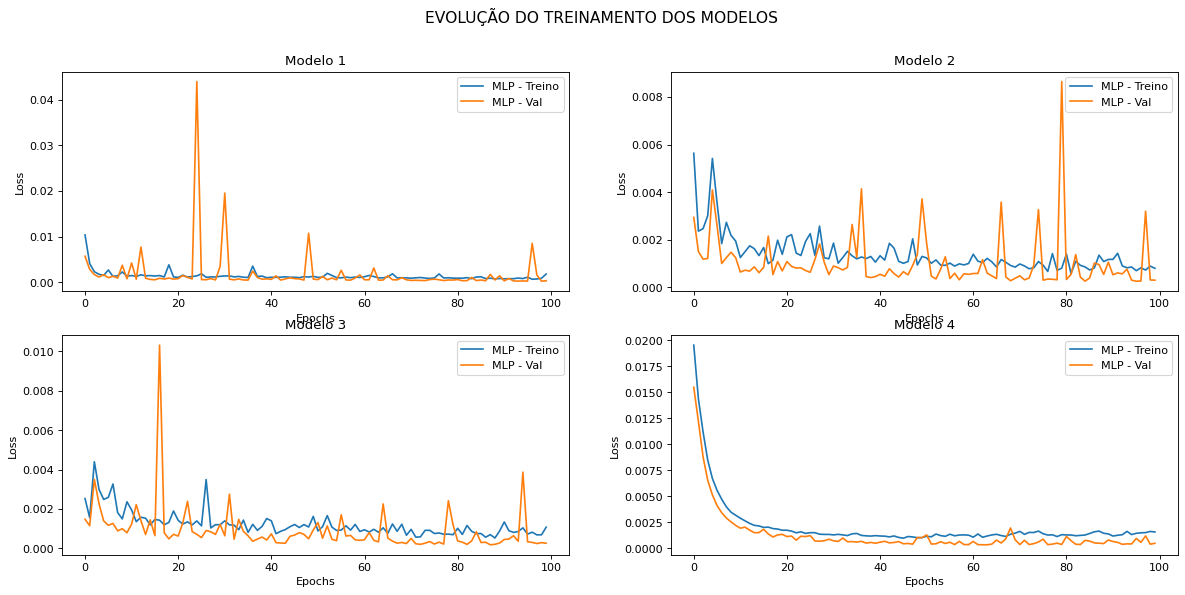

In [222]:
figure(figsize=(18,8),dpi=80)
plt.suptitle('EVOLUÇÃO DO TREINAMENTO DOS MODELOS', size=14)
for i, history_modelo in zip(range(0, len(lista_history_modelos)), lista_history_modelos):
    plt.subplot(2,2,i+1)
    plt.title('Modelo '+ str(i+1))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(history_modelo.history['loss'], label="MLP - Treino")
    plt.plot(history_modelo.history['val_loss'], label="MLP - Val")
    plt.legend()
plt.show()



**Avaliação (teste)**

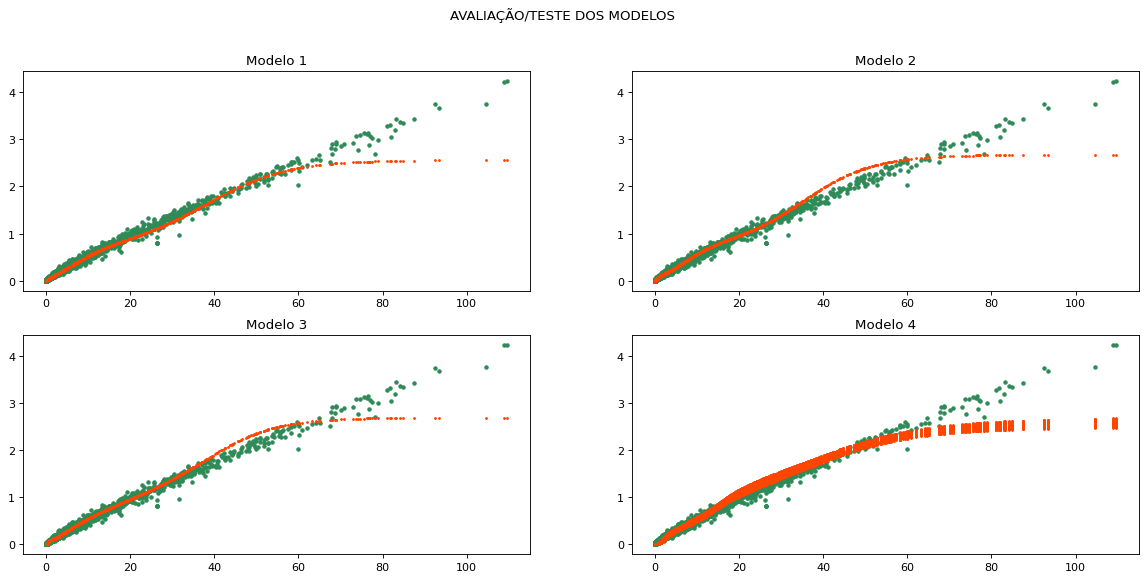

In [230]:
figure(figsize=(18,8),dpi=80)
plt.suptitle('AVALIAÇÃO/TESTE DOS MODELOS')



plt.subplot(2,2,1)
y_rest = modelo_a.predict(x_train)

plt.plot(x_train, y_train, '.', color='#2E8B57')
plt.plot(x_train, y_rest, '.', markersize=3 ,color='#FF4500')
plt.title('Modelo 1')

plt.subplot(2,2,2)
y_rest = modelo_b.predict(x_train)
plt.plot(x_train, y_train, '.', color='#2E8B57')
plt.plot(x_train, y_rest, '.', markersize=3 ,color='#FF4500')
plt.title('Modelo 2')

plt.subplot(2,2,3)
y_rest = modelo_c.predict(x_train)
plt.plot(x_train, y_train, '.', color='#2E8B57')
plt.plot(x_train, y_rest, '.', markersize=3 ,color='#FF4500')
plt.title('Modelo 3')

plt.subplot(2,2,4)
y_rest = modelo_final.predict(x_train)
plt.plot(x_train, y_train, '.', color='#2E8B57')
plt.plot(x_train, y_rest, '.', markersize=3 ,color='#FF4500')
plt.title('Modelo 4')


plt.show()

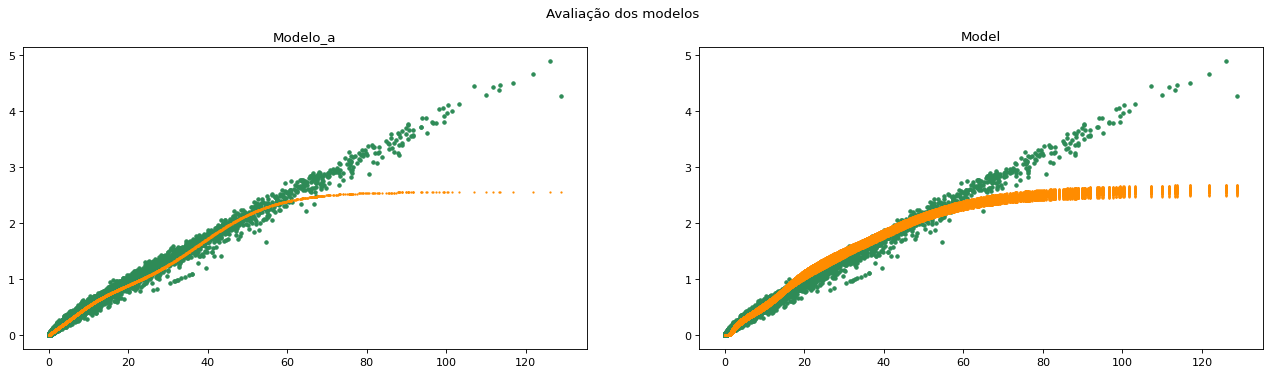

7886/7886 [==============================] - 16s 2ms/step - loss: 7.1861e-04 - mean_absolute_error: 0.0055


In [229]:
figure(figsize=(20,5),dpi=80)
plt.suptitle('Avaliação dos modelos')
plt.subplot(1,2,1)
y_res = modelo_a.predict(x_test)
plt.plot(x_test, y_test, '.', color='#2E8B57')
plt.plot(x_test, y_res, '.', markersize=2, color='#FF8C00')
plt.title('Modelo_a')

plt.subplot(1,2,2)
y_res = modelo_final.predict(x_test)
plt.plot(x_test, y_test, '.', color='#2E8B57')
plt.plot(x_test, y_res, '.', markersize=2, color='#FF8C00')
plt.title('Model')


plt.show()

test_loss = modelo_a.evaluate(x_test, y_test)
test_loss = modelo_b.evaluate(x_test, y_test)
test_loss = modelo_c.evaluate(x_test, y_test)
test_loss = modelo_final.evaluate(x_test, y_test)

In [228]:
score_modelo_a = modelo_a.evaluate(x_test, y_test, verbose=0)
print("Teste loss:", score_modelo_a[0])
print("Teste metric:", score_modelo_a[1])
print("\n\n")
score_modelo_b = modelo_b.evaluate(x_test, y_test, verbose=0)
print("Teste loss:", score_modelo_b[0])
print("Teste metric:", score_modelo_b[1])
print("\n\n")
score_modelo_c = modelo_c.evaluate(x_test, y_test, verbose=0)
print("Teste loss:", score_modelo_c[0])
print("Teste metric:", score_modelo_c[1])
print("\n\n")
score_model_final = modelo_final.evaluate(x_test, y_test, verbose=0)
print("Teste loss:", score_model_final[0])
print("Teste metric:", score_model_final[1])

Teste loss: 0.0005775868194177747
Teste metric: 0.00275796907953918



Teste loss: 0.0007186064030975103
Teste metric: 0.005540715530514717
